In [1]:
from code_agent.data.data_loader import load_json_as_dict
from code_agent.graph.execution.nodes.entry_node import entry_node
from code_agent.graph.execution.build import build_execution_subgraph

from dotenv import load_dotenv

load_dotenv()

True

In [2]:
# JSON 로드 및 input 추출
user_input_dict = load_json_as_dict("user_input_examples/simple_example.json")
print("[TEST] Loaded user input:", user_input_dict)

# entry_node에 전달하여 CodeExecutionState 생성
code_exec_state = entry_node(user_input_dict)

# 그래프 구조 출력
graph = build_execution_subgraph()
print("[TEST] Nodes:", list(graph.nodes))
print("[TEST] Edges:")
for src, dst in graph.edges:
    print(f"  {src} -> {dst}")

# 그래프 빌드 및 컴파일 후 실행 테스트
compiled_graph = graph.compile()
result = compiled_graph.ainvoke(code_exec_state)
print("[TEST] Graph execution result:", result)

[TEST] Loaded user input: {'input': '세 수의 곱을 구하는 파이썬 함수를 짜줘', 'user_id': 'user_123', 'session_id': 'sess_456', 'attachments': [], 'metadata': {}}
[TEST] Nodes: ['thread_manager_node', 'message_append_node', 'run_assistant_node', 'extract_result_node', 'error_handler_node']
[TEST] Edges:
  thread_manager_node -> message_append_node
  error_handler_node -> __end__
  __start__ -> thread_manager_node
  extract_result_node -> error_handler_node
  message_append_node -> run_assistant_node
[TEST] Graph execution result: <coroutine object Pregel.ainvoke at 0x000002C8961F4040>


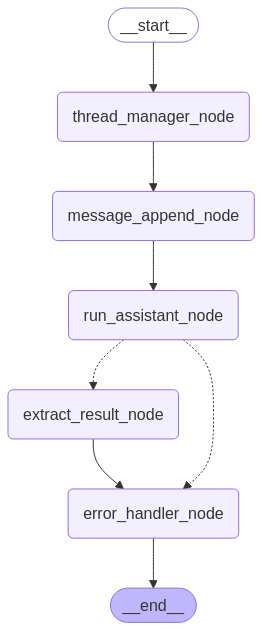

In [3]:
from IPython.display import Image, display

try:
    display(Image(compiled_graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass